<a href="https://colab.research.google.com/github/abhishekmohanty297/Deep_Learning/blob/main/ANN_CTTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df=pd.read_csv("/content/iris.data",header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.head(1)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa


In [10]:
df.columns=['SL','SW','PL','PW','FLOWER']
df.head(1)

,SL,SW,PL,PW,FLOWER
0,5.1,3.5,1.4,0.2,Iris-setosa


In [11]:
df.isnull().sum()

,0
SL,0
SW,0
PL,0
PW,0
FLOWER,0


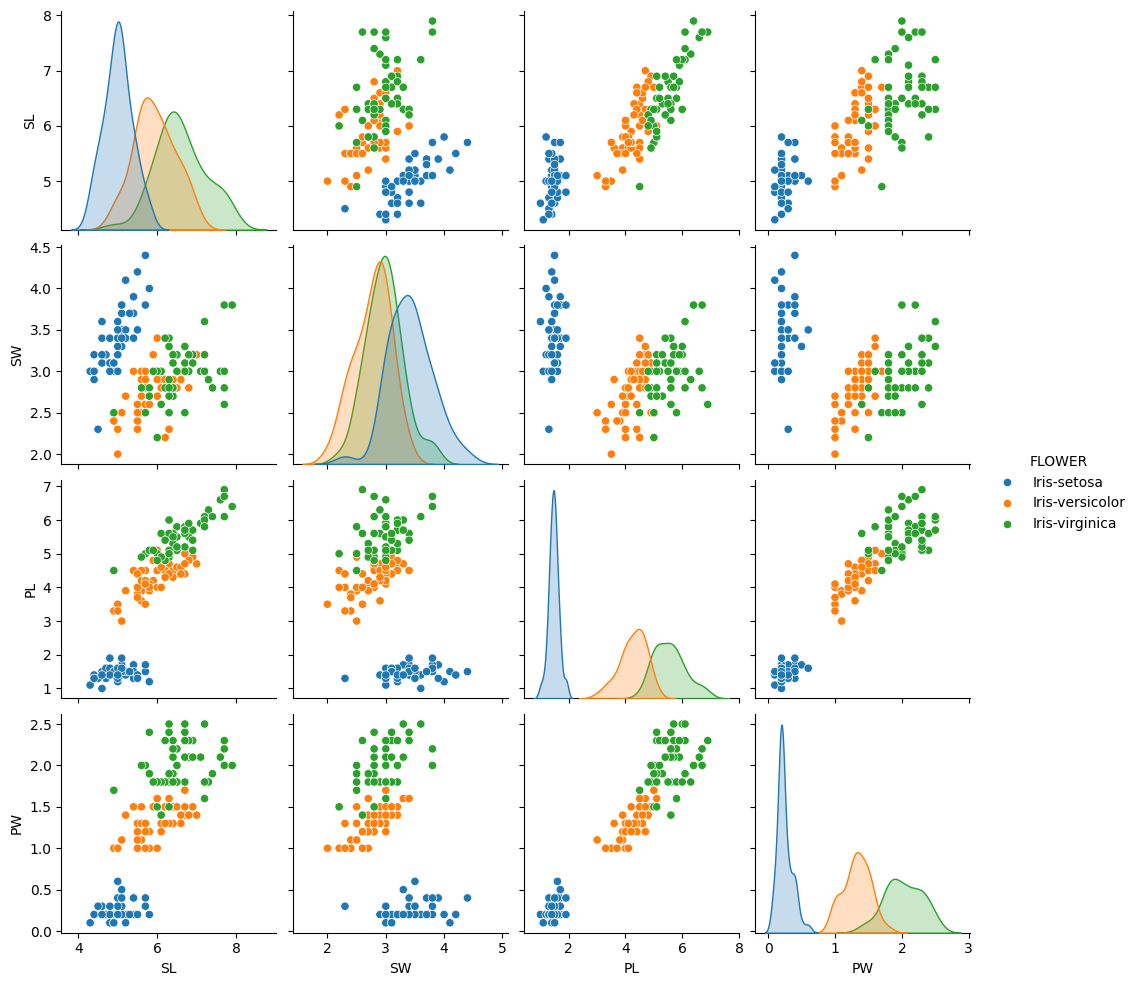

In [12]:
sns.pairplot(df,hue='FLOWER')
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
df.FLOWER=le.fit_transform(df.FLOWER)
df.FLOWER.unique()

array([0, 1, 2])

In [15]:
le.inverse_transform([0,1,2])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
ip=df.drop('FLOWER',axis=1)
op=df.FLOWER

In [17]:
from keras.utils import to_categorical
op=to_categorical(op,3)

In [18]:
op

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ip,op,test_size=0.2)


In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [21]:
x_train

array([[-0.81327391, -0.78124492,  0.05336021,  0.24757443],
       [-0.19324298, -0.53774001,  0.16873364,  0.11494527],
       [ 0.79880652, -0.53774001,  0.45716721,  0.38020358],
       [ 0.79880652, -0.05073019,  0.8032875 ,  1.04334937],
       [-0.9372801 , -1.26825474, -0.46582022, -0.15031304],
       [ 0.55079415,  0.67978454,  1.26478122,  1.70649515],
       [-1.55731104,  0.19277472, -1.33112094, -1.34397546],
       [-0.06923679, -0.78124492,  0.74560078,  0.91072021],
       [-0.9372801 ,  1.16679436, -1.38880765, -1.34397546],
       [-0.56526154,  2.14081399, -1.44649437, -1.07871714],
       [-0.56526154,  1.65380418, -1.33112094, -1.34397546],
       [ 0.30278177, -0.53774001,  0.51485393, -0.01768389],
       [-1.06128629,  0.67978454, -1.38880765, -1.34397546],
       [-1.06128629, -2.48577928, -0.17738665, -0.2829422 ],
       [-0.06923679, -1.02474983,  0.11104693, -0.01768389],
       [-0.31724916, -0.2942351 , -0.11969993,  0.11494527],
       [-0.31724916, -1.

In [37]:
model=Sequential()
model.add(Dense(30,input_dim=4,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(3,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.3646 - loss: 1.0368 - val_accuracy: 0.5333 - val_loss: 0.8100
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6725 - loss: 0.7931 - val_accuracy: 0.9333 - val_loss: 0.5714
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8021 - loss: 0.6334 - val_accuracy: 0.9333 - val_loss: 0.4195
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9181 - loss: 0.4635 - val_accuracy: 0.9000 - val_loss: 0.2795
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9242 - loss: 0.2722 - val_accuracy: 0.9333 - val_loss: 0.2162
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9571 - loss: 0.1719 - val_accuracy: 0.9333 - val_loss: 0.1240
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9635 - loss: 0.1314 - val_accuracy: 1.0000 - val_loss: 0.0632
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9773 - loss: 0.0576 - val_accuracy: 0.9000 - val_loss

In [40]:
pred=model.predict(x_test)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[1.4602004e-01, 8.5397995e-01, 3.7792571e-08],
       [9.6408476e-06, 9.9999028e-01, 2.2794064e-08],
       [9.9997896e-01, 2.0980615e-05, 2.6037362e-11],
       [9.9999982e-01, 1.5537999e-07, 3.6675619e-13],
       [1.3447351e-09, 7.2133853e-12, 9.9999994e-01],
       [3.0439296e-07, 1.1991250e-06, 9.9999839e-01],
       [6.8189644e-07, 9.9999911e-01, 1.4764269e-07],
       [9.9999982e-01, 8.3410306e-08, 3.5507567e-14],
       [1.0483762e-06, 9.9999863e-01, 2.4060853e-07],
       [4.4168777e-07, 9.9999923e-01, 2.4862240e-07],
       [1.2690954e-06, 9.9999851e-01, 8.7488367e-08],
       [9.5920041e-05, 9.9826425e-01, 1.6397985e-03],
       [9.9999791e-01, 1.9819397e-06, 3.3593715e-11],
       [1.6567780e-06, 9.9999779e-01, 4.7978807e-07],
       [9.9999994e-01, 5.4746806e-08, 1.6782268e-16],
       [9.9999994e-01, 1.4488664e-10, 1.0542490e-17],
       [7.9007828e-10, 8.3598553e-12, 9.9999994e-01],
       [9.9997538e-01, 2.4542074e-05, 8.4940987e-12],
       [6.7818178e-08, 9.999

In [41]:
p=np.argmax(pred,axis=1)
p

array([1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 2, 0, 2,
       2, 2, 1, 0, 0, 2, 1, 0])

In [42]:
y=np.argmax(y_test,axis=1)
y

array([0, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 0, 2,
       2, 2, 1, 0, 0, 2, 1, 0])

In [43]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(p,y)
ac

0.9333333333333333